In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/testing/

/content/drive/MyDrive/testing


In [ ]:
df_ccus = pd.read_csv("/content/drive/MyDrive/testing/Copy of CCUS_Sentiment_Analysis_Tweets_Dataset - CCUS_Sentiment_Analysis_Tweets_Dataset.csv")

In [ ]:
df_ccus.isna().sum()

,0
Language,0
Tweet,0
Benefit,2853
Concern,2837
Perception-Fight-climate-change,2806
Perception-Climate-friendly-technology,3011
Perception-Extensive-R&D-needed,2991
Perception-Better-options-than-CCS,2985
Sentiment,0
Relatedness,2827


In [ ]:
df_ccus.info()
df_ccus.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Language                                3030 non-null   object
 1   Tweet                                   3030 non-null   object
 2   Benefit                                 3030 non-null   object
 3   Concern                                 3030 non-null   object
 4   Perception-Fight-climate-change         3030 non-null   object
 5   Perception-Climate-friendly-technology  3030 non-null   object
 6   Perception-Extensive-R&D-needed         3030 non-null   object
 7   Perception-Better-options-than-CCS      3030 non-null   object
 8   Sentiment                               3030 non-null   object
 9   Relatedness                             3030 non-null   object
 10  Comment                                 3030 non-null   object
dtypes: o

,Language,Tweet,Benefit,Concern,Perception-Fight-climate-change,Perception-Climate-friendly-technology,Perception-Extensive-R&D-needed,Perception-Better-options-than-CCS,Sentiment,Relatedness,Comment
count,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030
unique,31,2954,9,10,2,2,2,2,3,2,10
top,en,DACC (Direct Air Carbon Capture) is an area of...,Nothing,Nothing,No,No,No,No,Neutral,Nothing,Nothing
freq,1779,6,2853,2837,2860,3026,2991,2985,2559,2827,3009


In [ ]:
df_ccus['Benefit'] = df_ccus['Benefit'].fillna("Nothing")
df_ccus['Concern'] = df_ccus['Concern'].fillna("Nothing")

df_ccus['Perception-Fight-climate-change'] = df_ccus['Perception-Fight-climate-change'].fillna("No")
df_ccus['Perception-Climate-friendly-technology'] = df_ccus['Perception-Climate-friendly-technology'].fillna("No")
df_ccus['Perception-Extensive-R&D-needed'] = df_ccus['Perception-Extensive-R&D-needed'].fillna("No")
df_ccus['Perception-Better-options-than-CCS'] = df_ccus['Perception-Better-options-than-CCS'].fillna("No")

df_ccus['Relatedness'] = df_ccus['Relatedness'].fillna("Nothing")
df_ccus['Comment'] = df_ccus['Comment'].fillna("Nothing")

In [ ]:
df_ccus.to_csv('/content/drive/MyDrive/testing/CCUS_Clean_dataset')

In [ ]:
df_ccus.isna().sum()

,0
Language,0
Tweet,0
Benefit,0
Concern,0
Perception-Fight-climate-change,0
Perception-Climate-friendly-technology,0
Perception-Extensive-R&D-needed,0
Perception-Better-options-than-CCS,0
Sentiment,0
Relatedness,0


In [ ]:
def find_tags(row_string):
    # use a list comprehension to find list items that start with #
    tags = [x for x in row_string if x.startswith('#')]

    return tags

df_ccus['split'] = df_ccus['Tweet'].str.split(' ')

df_ccus['tags'] = df_ccus['split'].apply(lambda row : find_tags(row))
# replace # as requested in OP, replace for new lines and \ as needed.
df_ccus['tags'] = df_ccus['tags'].apply(lambda x : str(x).replace('#', '').replace('\\n', ',').replace('\\', '').replace("'", ""))

df_ccus['tags']

,tags
0,[]
1,[]
2,"[energytransition,]"
3,[CCUS]
4,[]
...,...
3025,[]
3026,[]
3027,[CO2]
3028,[]


In [ ]:
import pandas as pd
import seaborn as sns
sns.set()

<Axes: xlabel='count', ylabel='Benefit'>

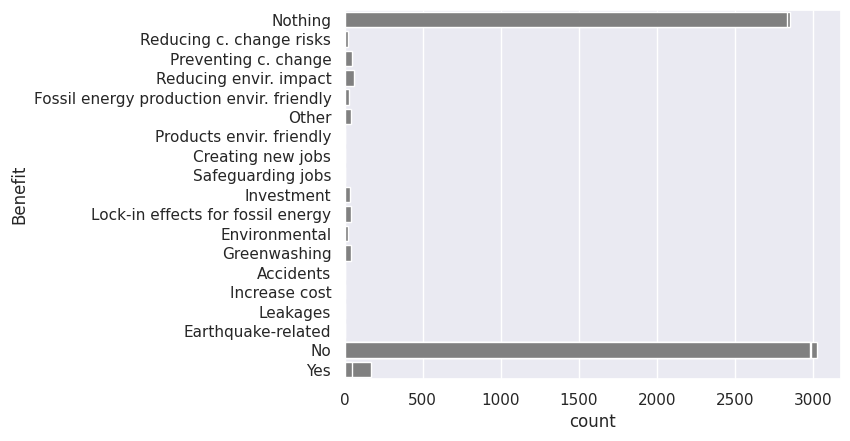

In [ ]:
graph = pd.DataFrame(df)
sns.countplot(graph['Benefit'], color='gray')

<Axes: xlabel='count', ylabel='Concern'>

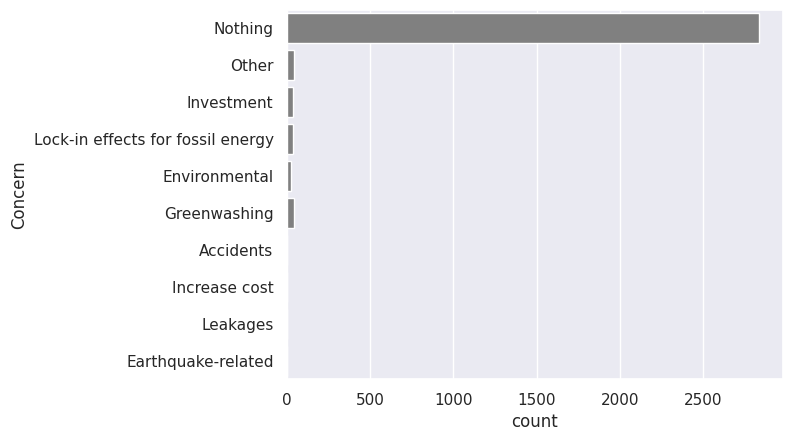

In [ ]:
sns.countplot(graph['Concern'], color='gray')

<Axes: xlabel='count', ylabel='Perception-Fight-climate-change'>

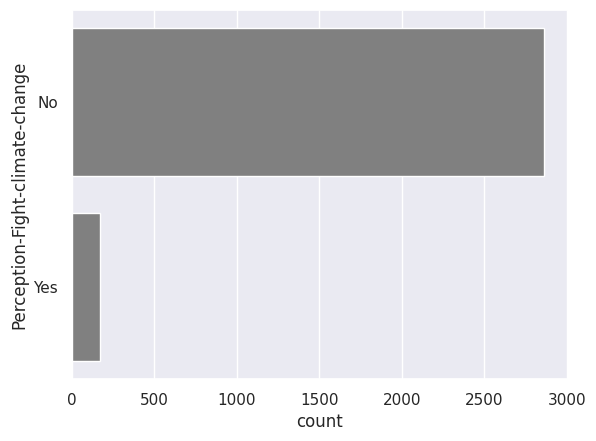

In [ ]:
sns.countplot(graph['Perception-Fight-climate-change'], color='gray')

<Axes: xlabel='count', ylabel='Perception-Climate-friendly-technology'>

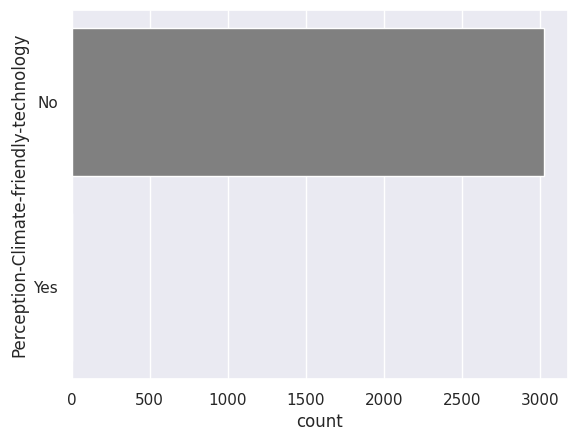

In [ ]:
sns.countplot(graph['Perception-Climate-friendly-technology'], color='gray')

<Axes: xlabel='count', ylabel='Perception-Extensive-R&D-needed'>

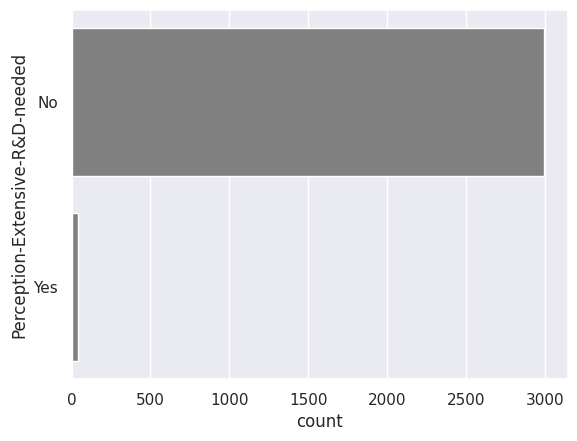

In [ ]:
sns.countplot(graph['Perception-Extensive-R&D-needed'], color='gray')

<Axes: xlabel='count', ylabel='Perception-Better-options-than-CCS'>

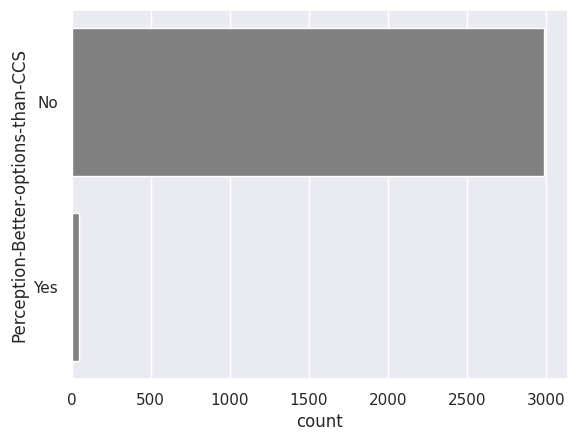

In [ ]:
sns.countplot(graph['Perception-Better-options-than-CCS'], color='gray')